###  The goal is to predict who will survive the Titanic

In [14]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)


In [25]:
# Import our test and training set data
test_set_df = pd.read_csv("titanic/test.csv")

In [26]:
train_set_df = pd.read_csv("titanic/train.csv")

In [27]:
test_set_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [28]:
def preprocess_data(df):
    # Remove unwanted Columns 
    df = df.drop(columns=["PassengerId", "Name", "Cabin"])

    # Define the preprocessing for numerical and catergorical features
    numerical_features = ['Age', 'Fare']
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('scaler', StandardScaler())
    ])

    categorical_features = ['Pclass', 'Sex', 'Embarked']
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])
    # Combine preprocessing steps
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ])
    
    # Apply the preprocessing
    df_processed = preprocessor.fit_transform(df)

    return df_processed

In [29]:
X_train = train_set_df.drop("Survived", axis=1)
y_train = train_set_df['Survived']

In [30]:
X_train = preprocess_data(X_train)
x_test = preprocess_data(test_set_df)

In [31]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [33]:
sgd_clf.predict(x_test)

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [41]:
from sklearn.model_selection  import cross_val_score, cross_val_predict
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='recall')
y_scores = cross_val_predict(sgd_clf, X_train, y_train, cv=3, method="decision_function")

In [35]:
y_train.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [42]:
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(y_train, y_scores)

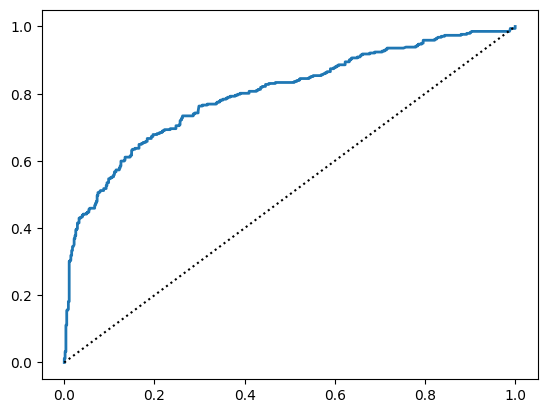

In [44]:
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")


In [45]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)


In [55]:

cross_val_score(forest_clf, X_train, y_train, cv=3, scoring='recall')

array([0.64912281, 0.76315789, 0.70175439])

In [47]:
y_probas_forest[:2]

array([[1.  , 0.  ],
       [0.01, 0.99]])

In [50]:
from sklearn.metrics import precision_recall_curve
y_score_forest = y_probas_forest[:, 1]
precision_forest, recall_forest, threshold_forest = precision_recall_curve(y_train, y_score_forest)

y_forest_scores = cross_val_predict(forest_clf, X_train, y_train, cv=3, method="predict_proba")

fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train, y_scores)

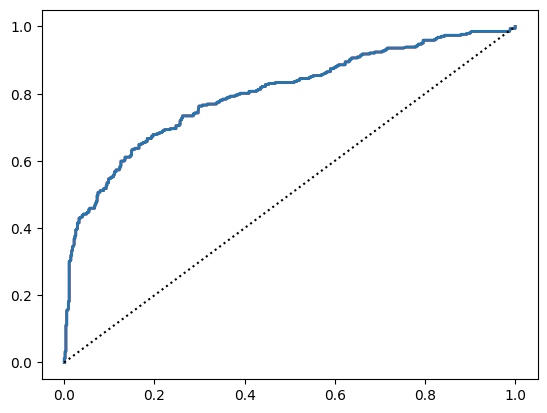

In [53]:
plt.plot(fpr_forest, tpr_forest, "r-", linewidth=2, label='Random Forest')
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")


In [59]:
from xgboost import XGBClassifier

In [60]:
xgb_class = XGBClassifier()
xgb_class.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [63]:
cross_val_score(xgb_class, X_train, y_train, cv=3)

array([0.8047138 , 0.84511785, 0.79461279])